# Introduction

The goal of this project is to analyze biodiversity within 4 major National Parks within the US. The data has been collected from the National Parks Service, and contains observations on various species throughout these parks.

This project seeks to use this dataset to answer the following questions:
-   How diverse are the categories of species in these parks
-   Which Species are more in danger/ Need of Protection?
-   What is the most common Conservation Status for each Species Category?
-   Which Species are proportionally protected the most?
-   Is there a difference in biodiversity within the parks?
-   Can you measure when a species might be classified as Endangered?

**Data Sources:**

Both datasets `Observations.csv` and `Species_info.csv` were provided by [Codecademy.com](https://www.codecademy.com)

Note: The data for this project is inspired by real data, but is mostly fictional


# Scoping

To give a brief Scope of this project, the outline is the following:

**Data:**
In this part of the project, we will try and deconstruct the dataset to more accurately understand what it is we are working with. This will include seeing what each column is, what the values in those columns represent, if there are any missing values, or complete outliers.

**Analyses:**
Here, we will take our foundations and insights from the dataset in general, and try to bring the dataset to life using Stacked Bar Charts, Histograms, Pie Charts and tables. The intention here is to use Data Analytics concepts to answer our questions from the beginning, answering each one in order.

**Evaluation/Conclusion:**
Finally, we will review our insights and try to answer all our questions from the information we found, and make a final conclusion on the overall biodiversity of the parks in these datasets



## Data

To start, we need to first import all the necessary libraries for our project. Following that, we can read the csv files that we will be using, `Observations.csv` and `Species.csv` and store them in a variable to use later.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import chi2_contingency

obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

print(obs.head())
print("==================================================================================")
print(species.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

### Head

Although this might seem confusing at first, essentially what this shows us is that the observations dataset contains the number of observations of each scientific named species in each park.

The Species dataset on the other hand, also contains the scientific name for each species, but it also contains the common_names, conservation_status, and category. Where Category seems to be if the species is a Mammal, Bird and so on, but we will look more into that later.

Two main things to notice here are that firstly, the conservation status, which is supposed to say if a species is Threatened or Safe, has NaN values, which means no values. According to the provider of this dataset, this means that these species are not under any necessary surveilance and therefore are not protected, most likely because they dont need protection. We will have to modify that to make it clear later.

The other thing to notice is, both datasets have the same column `scientific_names`, which means that, we can join these two datasets based on `scientific_names`. This will allow us to see which Category and Conservation Status, each observation is in!

In [3]:
results = pd.merge(obs,species,on=['scientific_name'])
print(f"Columns in new Joined Dataset: \n {list(results.columns)}")
print("=================================================================================")
print(results.head())

Columns in new Joined Dataset: 
 ['scientific_name', 'park_name', 'observations', 'category', 'common_names', 'conservation_status']
      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal             

### Merging

Perfect, now we have merged both the `Observations` dataset with the `Species` dataset. This allows us to now see, given every observation, what the category and conservation status of that observation is.

For instance, we now can tell that from the first row that the Vicia benghalensis, which has 68 observations in the Smoky mountains, is a Vascular Plant, and is commonly known as Purple Vetch, and is not currently under surveilance.

Great! Moving on, we will now have a deeper look into our data

In [4]:

print("===================================================================")
print(f"Number of Categories: {results.category.nunique()}")
print(f"Categories in this dataset: {results.category.unique()}")
print("===================================================================")
print(f"Total number of observations: {results.observations.sum()}")
print(f"Total number of unique observations: {results.observations.count()}")
print("===================================================================")
print(f"Number of unique locations recorded: {results.park_name.nunique()}")
print(f"Unique locations: {results.park_name.unique()}")
print("===================================================================")


Number of Categories: 7
Categories in this dataset: ['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
Total number of observations: 3645247
Total number of unique observations: 25632
Number of unique locations recorded: 4
Unique locations: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']


### Categories, Observations, and Locations:

Here we can get a quick preview of some of the initial columns in our dataset. To start off we can see that we have 7 different species categories. As you can probably tell, these categories are not only inclusive of animals but two different species of plant as well. Plants can have a far larger population size than animals so we will look into that later to see if it interfiers with the visualization of our data.

For observations, we can see that we have over 3 million total spotted observations. Here this means that for instance, if I saw a lion 10 times, and a cat 13 times, this would count as a total of 23 observations and not 2. However, this dataset contains over 25 thousand unique observations, which means unique combinations of observations. For instance, a lion who was seen 10 times on Yellowstone and another lion that was seen 20 times on Smoky Mountains, counts as 2 unique observations.

And finally, for locations we have 4 total unique possible locations, some might have a greater population of species than others and we will look into that later.

In [5]:
results.fillna(value={'conservation_status':'No Intervention'},inplace=True)
print(f"Number of types of conservation status: {results.conservation_status.nunique()}")
print(f"Types of conservation status: {results.conservation_status.unique()}")
print("==================================================================================")

Number of types of conservation status: 5
Types of conservation status: ['No Intervention' 'Species of Concern' 'Threatened' 'Endangered'
 'In Recovery']


### Conservation Status:

Remember those NaN, or missing values we found earlier. Well, as previously stated, those values apparently mean that these species are not under any kind of protection or surveilance. Therefore, we labeled all of them as `No Intervention` for the remainder of this analysis.

Here we can see there are 5 unique values that an species can be in this data, and they range from:
- Species of Concern: declining or appear to be in need of conservation
- Threatened: vulnerable to endangerment in the near future
- Endangered: seriously at risk of extinction
- In Recovery: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range

In [6]:
print("=====================================================")
print(results.groupby('category').size())
print("=====================================================")
print(results.groupby('park_name').size())
print("=====================================================")
print(results.groupby('conservation_status').size())
print("=====================================================")

category
Amphibian              328
Bird                  2364
Fish                   524
Mammal                1200
Nonvascular Plant     1332
Reptile                324
Vascular Plant       19560
dtype: int64
park_name
Bryce National Park                    6408
Great Smoky Mountains National Park    6408
Yellowstone National Park              6408
Yosemite National Park                 6408
dtype: int64
conservation_status
Endangered               80
In Recovery              24
No Intervention       24752
Species of Concern      732
Threatened               44
dtype: int64


### Deep Dive into: Category, Park Observations, Conservation Status:

Here the data has been grouped into these three categories, where each table shows how many of each are in the dataset. For instance, in terms of Category, 19560 of the total cells are data on Vascular Plants. With the second and third highest being Bird and Mammals respectively.

For Park Observation, it seems based on these findings that this dataset was built with the same combinations in every park. Meaning that, every cell will be the same for each park, the only thing changing is the amount of observations of each cell in each park.

For conservation status, there is a clear vast difference between the Not Protected and the Protected. This could very much cause some vizualization issues, considering this is almost the entire dataset. Therefore, if we want to focus on the species in danger, we will most likely have to, at times, seperate the protected from the not, for better visualization.

conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                   4.0          NaN                16.0         8.0
Bird                       16.0         12.0               320.0         NaN
Fish                       12.0          NaN                16.0        20.0
Mammal                     44.0         12.0               168.0         8.0
Nonvascular Plant           NaN          NaN                20.0         NaN
Reptile                     NaN          NaN                20.0         NaN
Vascular Plant              4.0          NaN               172.0         8.0


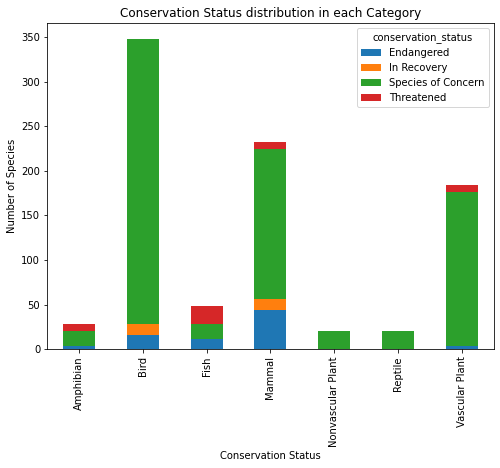

In [11]:
Cat_NotProtected = results[results.conservation_status != 'No Intervention'].groupby(
    ['category','conservation_status']
)['scientific_name'].count().unstack()
print(Cat_NotProtected)
print("==========================================================================================")

ax = Cat_NotProtected.plot(kind = 'bar', figsize = (8,6),stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.title('Conservation Status distribution in each Category')
plt.show()
plt.close()

### Conservation v Category Table:

Of course, we will look into this data in a diagram soon, but just as a quick glimpse this table was created. Here, the data was filtered to only contain protected animals as we want to focus on them primarily. 

In the table above, you can tell that majority of the species fall into the `Species of Concern` conservation status. Of those, Mammals, Birds, and Vascular Plants have the highest rate. 

The next most common conservation status seems to be Endangered, with the same categories having the highest rate.

This implies that animals tend to be, at least during this point, at a very high risk of extenction, or a small concern, but little in between. And also, Birds and Mammals are the most in need of protection.

But is this just because there are more Mammals and Birds overall? And therefore it seems like they are the most in danger? How could we test this? We will look more into this in the **Protected v Not Protected** section.

In [12]:
print("=================================================================================")
results['is_protected'] = results.conservation_status != 'No Intervention'
category_counts = results.groupby(['category','is_protected']).scientific_name.nunique()\
    .reset_index().pivot(columns='is_protected',index='category',values='scientific_name')\
        .reset_index()
category_counts.columns = ['category','not_protected','protected']
print(category_counts)
print("==================================================================================")
category_counts['Percentage Protected'] = round((category_counts.protected/(\
    category_counts.protected + category_counts.not_protected))*100,2)
print(category_counts)
print("==================================================================================")

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46
            category  not_protected  protected  Percentage Protected
0          Amphibian             72          7                  8.86
1               Bird            413         75                 15.37
2               Fish            115         11                  8.73
3             Mammal            146         30                 17.05
4  Nonvascular Plant            328          5                  1.50
5            Reptile             73          5                  6.41
6     Vascular Plant           4216         46                  1.08


### Protected v Not Protected Part I:

To start off we can see that majority of each Category is Not Protected, with the highest proportion of protected being 17% and 15% for Mammals and Birds respectively.

This shows that, even though the Vescular Plant had one of the highest observations, and second highest Species of Concern, its proportion of being protected is miniscule, almost 1%. 

These findings beg the question we brought up earlier. Are the numbers of species protected based on just the amount of the population, or is it statistically significant that these species are more protected than others. We can use Chi Squared to answer that question.

In [13]:
contingency_Bird_Mammal = [[30,146],[75,413]]
chi2,pval,dof, expected = chi2_contingency(contingency_Bird_Mammal)
print(f"Bird V Mammal P-Value: {round(pval,3)}")
contingency_Mammal_Reptile = [[30,146],[5,73]]
chi2,pval,dof,expected = chi2_contingency(contingency_Mammal_Reptile)
print(f"Mammal V Reptile P-Value: {round(pval,3)}")

Bird V Mammal P-Value: 0.688
Mammal V Reptile P-Value: 0.038


### Protected v Not Protected Part II:

Here what we are trying to find is if it is a coincidence that Mammals and Birds have the highest need for protection, or if it is true that they do, or statistically significant at least

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

Here, by using a Chi Squared Test, we get the amount of Mammals that are protected, and the amount that arent. We also get the amount of reptiles that are protected, and the amount that arent. Through the Chi Square test, one of the results we get is the p-value.

A p-value that is less than 0.05 tends to be considered statistically significant. Therefore, by plotting Mammals and Birds, which were the two highest, there wasnt a significant different between them.

But when trying to see if there is a significant difference between Mammals and a Category that wasnt as much seen as being in danger, such as Reptile, we get a p-value of 0.038, which is less than our significance threshold of 0.05! This means that statistically, Mammals show they significantly need a higher rate of protection than reptiles for instance.

park_name
Bryce National Park                     633291
Great Smoky Mountains National Park     474863
Yellowstone National Park              1587641
Yosemite National Park                  949452
Name: observations, dtype: int64


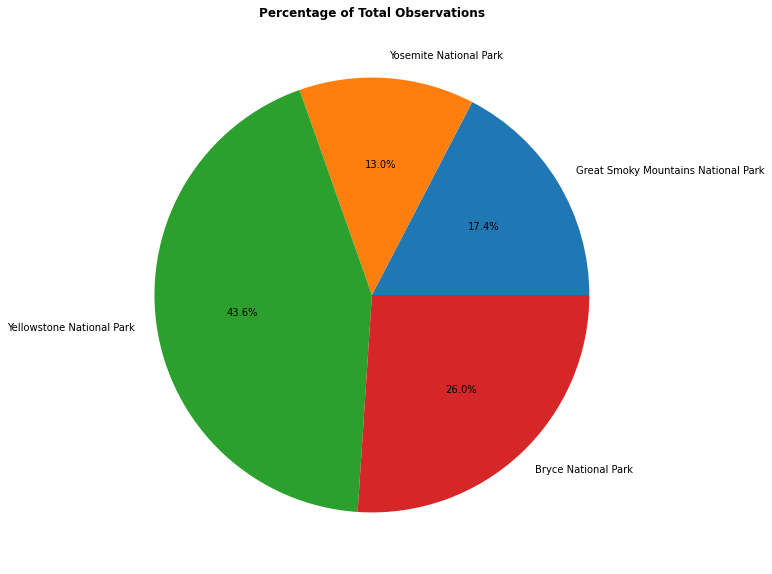

In [16]:
plt.figure(figsize=(13,10))
park_obs = results.groupby('park_name').observations.sum()
print(park_obs)
plt.pie(park_obs,labels = results.park_name.unique(),autopct='%0.1f%%')
plt.title('Percentage of Total Observations',weight='bold')
plt.show()
plt.close()
print("==========================================================================")

### Splitting into Parks

Just to get started in analyzing the specific bio diversity of the individual parks, here we can see that Yellowstone is by far the largest National Park with over 43% of the total observations, followed by Bryce, Smoky Mountains, and Yosemite.

<Figure size 936x720 with 0 Axes>

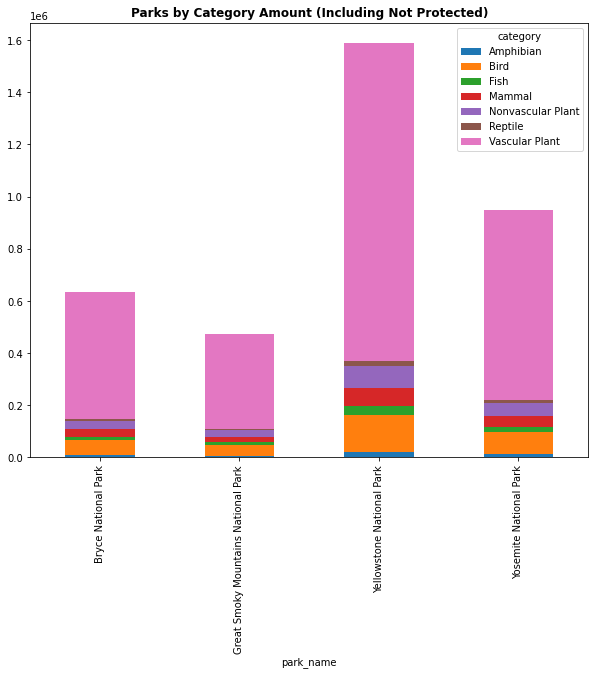

In [33]:
print("=====================================================")
plt.figure(figsize=(13,10))
park_categories = results.groupby(['park_name','category']).observations.sum().unstack()
park_categories.plot(kind='bar',figsize=(10,8),stacked=True)
plt.title('Parks by Category Amount (Including Not Protected)',weight='bold')
plt.show()
plt.close()

#### Parks Not Protected

In the diagram above, the not protected Species were included as well. In this case, it can clearly be seen that the overwhelming majority are vascular plants, given that the dataset contains Not Protected Species.

This of course doesnt allow us to see the full picture of how diverse each park really is, therefore another graph with only the protected amounts and categories are displayed was made:

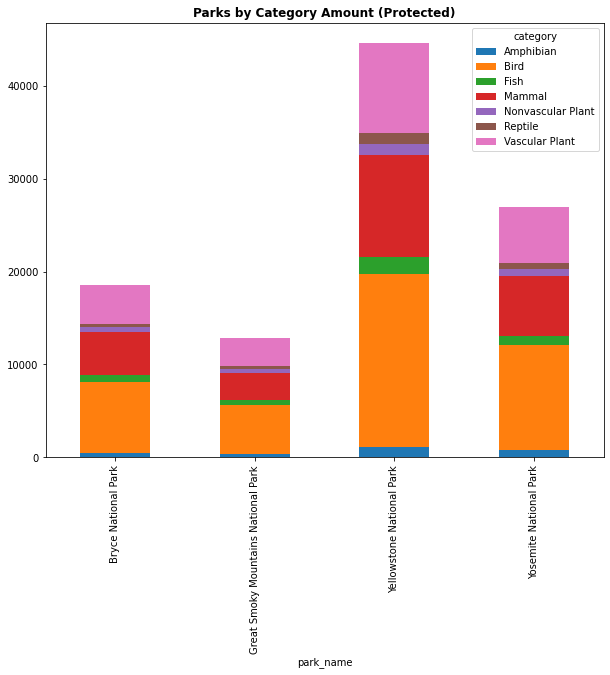

In [34]:
park_cat_protected = results[results.conservation_status != 'No Intervention'].groupby(['park_name','category']).observations.sum().unstack()
park_cat_protected.plot(kind='bar',figsize=(10,8),stacked=True)
plt.title('Parks by Category Amount (Protected)',weight='bold')

plt.show()
plt.close()

print("=====================================================")

#### Parks Protected

Aha! This is better. Here we can see that although there is a variation in the overall amount of observations in each, as different National Parks of course have different sizes, the diversification seems to be very similar.

All of them seem to include, even if by a bit, each of the Categories of Species. However, the pattern of diversification proportion seems to remain the same in all. That being, Birds have the highest proportion, then Mammals, then Vascular Plants on a close second.

So although the amount of species in each is different, the proportions of biodiversity remain the same, and only one species of plant seem to appear mostly, even though there are two! Interesting.

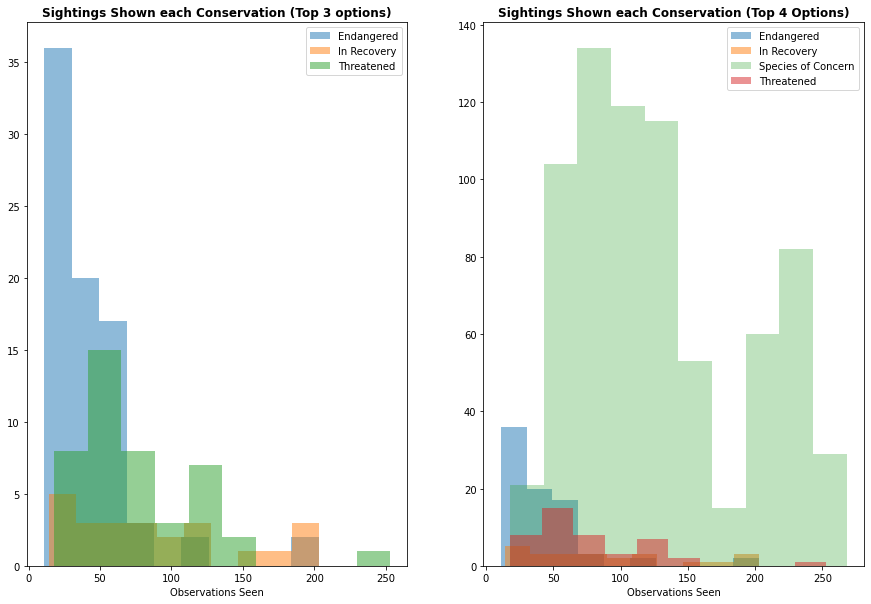

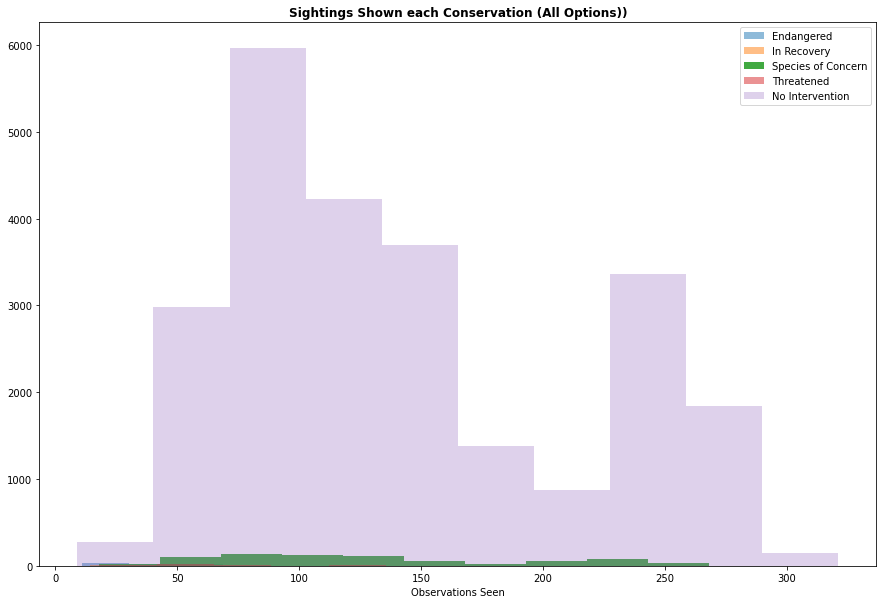

In [41]:
print("=====================================================")
Endangered = results.observations[results.conservation_status == 'Endangered']
In_Recovery = results.observations[results.conservation_status == 'In Recovery']
Species_of_Concern = results.observations[results.conservation_status == 'Species of Concern']
Threatened = results.observations[results.conservation_status == 'Threatened']
No_Intervention = results.observations[results.conservation_status == 'No Intervention']
plt.figure(figsize=(15,10))
ax = plt.subplot(1,2,1)
plt.hist(Endangered,alpha=0.5,label='Endangered')
plt.hist(In_Recovery,alpha=0.5,label='In Recovery')
#plt.hist(Species_of_Concern,alpha=0.5,label='Species of Concern')
plt.hist(Threatened,alpha=0.5,label='Threatened')
#plt.hist(No_Intervention,alpha=0.5,label='No Intervention')
plt.legend()
plt.title('Sightings Shown each Conservation (Top 3 options)',weight='bold')
plt.xlabel('Observations Seen')
plt.subplot(1,2,2)
plt.hist(Endangered,alpha=0.5,label='Endangered')
plt.hist(In_Recovery,alpha=0.5,label='In Recovery')
plt.hist(Species_of_Concern,alpha=0.3,label='Species of Concern')
plt.hist(Threatened,alpha=0.5,label='Threatened')
#plt.hist(No_Intervention,alpha=0.5,label='No Intervention')
plt.title('Sightings Shown each Conservation (Top 4 Options)',weight='bold')
plt.xlabel('Observations Seen')
plt.legend()
plt.show()
plt.close()
plt.figure(figsize=(15,10))
ax3 = plt.subplot(1,1,1)
plt.hist(Endangered,alpha=0.5,label='Endangered')
plt.hist(In_Recovery,alpha=0.5,label='In Recovery')
plt.hist(Species_of_Concern,alpha=0.9,label='Species of Concern')
plt.hist(Threatened,alpha=0.5,label='Threatened')
plt.hist(No_Intervention,alpha=0.3,label='No Intervention')
plt.legend()
plt.title('Sightings Shown each Conservation (All Options))',weight='bold')
plt.xlabel('Observations Seen')
plt.show()
plt.close()

### Final Diagram and Analysis:

Finally, we can finish off by looking at the question of, is there a way to measure when a Species is Endangered?

Looking at the following transparent Histogram, it seems like the answer is yes.

The diagrams follow a more big picture and vague view after each one. The first Diagram on the top left, shows only the first three options of `Endangered`, `Threatened` and `In Recovery`.

There you can see that it seems that the more in danger an animal is, the more concentrated the normal curve is. For Endangered animals, sightings that fall very heavily between 10 and 50 tend to be more Endangered. As the Categories become more relaxed, so does the spread of the normal curve.

This pattern of, the more safe, the more spread out the observations are, is something that follows through in each of the following diagram, and seems to be the case with every Conservation Status.

## Conclusion

As a quick conclusion to answer all our initial questions and evaluate our findings:

This project seeks to use this dataset to answer the following questions:
-   How diverse are the categories of species in these parks
    - There are 7 Categories of Species, however the most prominent that arent protected, are the Vascular Plants. In terms of the Protected, majority of the biodiversity are Birds, Mammals, and once more, Vascular Plants

-   Which Species are more in danger/ Need of Protection?
    - The Species that we found that are proportionally in most need of Portection are Birds and Mammals
-   What is the most common Conservation Status for each Species Category?
    - The overwhelming majority of the animals in this dataset fall into the `Species of Concern` Concervation Status, which is the lowest in terms of danger.

-   Is there a difference in biodiversity within the parks?
    - It seems that although the quantity of observation in each park is different, as one would expect, the biodiversity seems almost identical. With the same proportions of Species in each one.

-   Can you measure when a species might be classified as Endangered?
    - According to this data, if the mean number of observations of the species is heavily concentrated within the 10 - 60 range, the species is probably Endangered.